<strong><h1>Tugas Data Mining

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

In [138]:
dataset = pd.read_csv('citrus.csv')
dataset

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [139]:
dataset.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [140]:
dataset.shape

(10000, 6)

In [141]:
cat = {'name': {'orange': 0, 'grapefruit': 1}}
dataset.replace(cat, inplace=True)
dataset

,name,diameter,weight,red,green,blue
0,0,2.96,86.76,172,85,2
1,0,3.91,88.05,166,78,3
2,0,4.42,95.17,156,81,2
3,0,4.47,95.60,163,81,4
4,0,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,1,15.35,253.89,149,77,20
9996,1,15.41,254.67,148,68,7
9997,1,15.59,256.50,168,82,20
9998,1,15.92,260.14,142,72,11


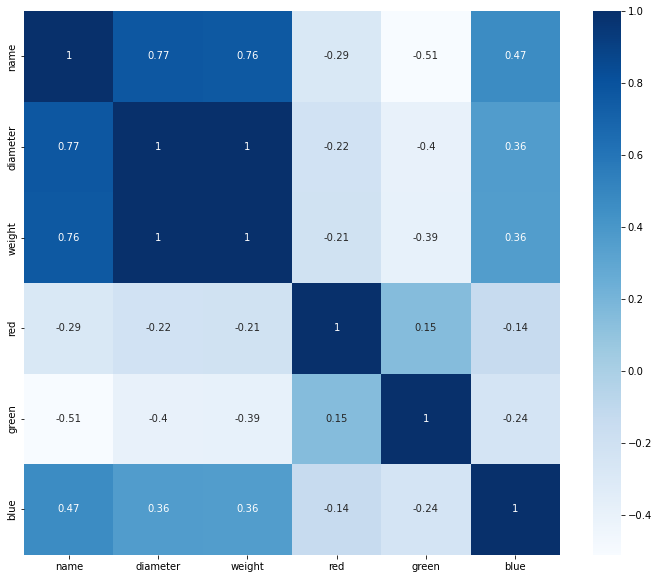

In [142]:
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [143]:
cor_target = abs(cor["name"])
relevant_features = cor_target[(cor_target>0.5) | (cor_target<-0.5)]
relevant_features

name        1.000000
diameter    0.770768
weight      0.761567
green       0.510564
Name: name, dtype: float64

In [144]:
df = dataset[['name', 'diameter', 'weight', 'green']]
df

,name,diameter,weight,green
0,0,2.96,86.76,85
1,0,3.91,88.05,78
2,0,4.42,95.17,81
3,0,4.47,95.60,81
4,0,4.48,95.76,72
...,...,...,...,...
9995,1,15.35,253.89,77
9996,1,15.41,254.67,68
9997,1,15.59,256.50,82
9998,1,15.92,260.14,72


In [145]:
df.shape

(10000, 4)

In [146]:
df.describe()

,name,diameter,weight,green
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.500000,9.975685,175.050792,76.010600
std,0.500025,1.947844,29.212119,11.708433
min,0.000000,2.960000,86.760000,31.000000
25%,0.000000,8.460000,152.220000,68.000000
50%,0.500000,9.980000,174.985000,76.000000
75%,1.000000,11.480000,197.722500,84.000000
max,1.000000,16.450000,261.510000,116.000000


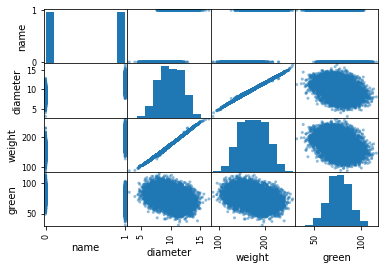

<Figure size 864x720 with 0 Axes>

In [147]:
scatter_matrix(df)
plt.figure(figsize=(12,10))
plt.show()

In [148]:
arr = df.values
X = arr[:, 1:4]
y = arr[:, 0]

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=df.name.values)

In [150]:
X_test.shape

(2000, 3)

In [151]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [152]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [153]:
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
knn_val = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print("%0.2f accuracy with a standard deviation of %0.2f" % (knn_val.mean(), knn_val.std()))

0.90 accuracy with a standard deviation of 0.01


In [154]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [155]:
pred = model.predict(X_test)
real = y_test

In [156]:
cm = confusion_matrix(pred, real)
cm_display = ConfusionMatrixDisplay(cm)

<Figure size 864x720 with 0 Axes>

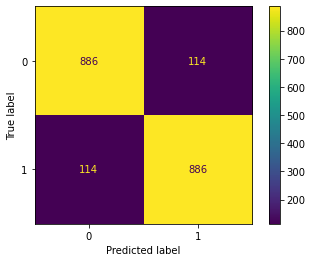

In [157]:
plt.figure(figsize=(12,10))
cm_display.plot()
plt.show()